In [4]:
!pip install apyori


  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=ab93584462795d2f80bad21a51c90c654fb98d42f6b8c4bb961807fa0ba32cc4
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [1]:
import pandas as pd

# 1) Read Online Retail Excel
online = pd.read_excel(
    "Online Retail.xlsx",
    sheet_name="Online Retail"
)

# 2) Remove cancelled invoices (InvoiceNo contains 'C')
online = online[~online["InvoiceNo"].astype(str).str.contains("C")]

# 3) Remove non-positive quantity
online = online[online["Quantity"] > 0]

# 4) Keep necessary columns & drop NA
online = online[["InvoiceNo", "Description"]].dropna()

# Optional: clean text
online["Description"] = online["Description"].str.strip()

print(online.head())


  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.


In [2]:
# Group items by InvoiceNo → each invoice is one transaction
transactions = (
    online
    .groupby("InvoiceNo")["Description"]
    .apply(list)
    .tolist()
)

print("Number of transactions:", len(transactions))
print("Sample transactions:", transactions[0:3])


Number of transactions: 20136
Sample transactions: [['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER'], ['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT'], ['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']]


In [5]:
from apyori import apriori

results = list(apriori(
    transactions,
    min_support=0.02,
    min_confidence=0.0,
    min_length=1
))


In [6]:
frequent_itemsets = []

for r in results:
    itemset = tuple(r.items)
    support = r.support
    frequent_itemsets.append((itemset, support))

# Sort by support descending
frequent_itemsets = sorted(
    frequent_itemsets,
    key=lambda x: x[1],
    reverse=True
)

print("Top frequent itemsets:")
for itemset, sup in frequent_itemsets[:20]:
    print(itemset, "support =", round(sup, 4))


Top frequent itemsets:
('WHITE HANGING HEART T-LIGHT HOLDER',) support = 0.1122
('JUMBO BAG RED RETROSPOT',) support = 0.1039
('REGENCY CAKESTAND 3 TIER',) support = 0.0988
('PARTY BUNTING',) support = 0.0837
('LUNCH BAG RED RETROSPOT',) support = 0.0777
('ASSORTED COLOUR BIRD ORNAMENT',) support = 0.0723
('SET OF 3 CAKE TINS PANTRY DESIGN',) support = 0.0688
('PACK OF 72 RETROSPOT CAKE CASES',) support = 0.0656
('LUNCH BAG  BLACK SKULL.',) support = 0.0632
('NATURAL SLATE HEART CHALKBOARD',) support = 0.062
('JUMBO BAG PINK POLKADOT',) support = 0.0605
('HEART OF WICKER SMALL',) support = 0.0596
('JUMBO STORAGE BAG SUKI',) support = 0.0588
('JUMBO SHOPPER VINTAGE RED PAISLEY',) support = 0.0584
('JAM MAKING SET PRINTED',) support = 0.0577
("PAPER CHAIN KIT 50'S CHRISTMAS",) support = 0.0576
('LUNCH BAG SPACEBOY DESIGN',) support = 0.0575
('LUNCH BAG CARS BLUE',) support = 0.0571
('SPOTTY BUNTING',) support = 0.0567
('JAM MAKING SET WITH JARS',) support = 0.0563


In [11]:
from apyori import apriori

rules = list(apriori(
    transactions,          # danh sách 10k transactions
    min_support=0.01,      # xuất hiện ≥ 1% hóa đơn
    min_confidence=0.3,    # độ tin cậy ≥ 30%
    min_lift=1.2,          # luật có ý nghĩa
    min_length=2           # ít nhất 2 sản phẩm
))


for r in results[:10]:
    print(tuple(r.items), "support =", round(r.support, 4))


('3 STRIPEY MICE FELTCRAFT',) support = 0.0232
('4 TRADITIONAL SPINNING TOPS',) support = 0.024
('6 RIBBONS RUSTIC CHARM',) support = 0.0474
('60 CAKE CASES DOLLY GIRL DESIGN',) support = 0.0217
('60 CAKE CASES VINTAGE CHRISTMAS',) support = 0.0307
('60 TEATIME FAIRY CAKE CASES',) support = 0.0411
('72 SWEETHEART FAIRY CAKE CASES',) support = 0.0305
('ALARM CLOCK BAKELIKE CHOCOLATE',) support = 0.0213
('ALARM CLOCK BAKELIKE GREEN',) support = 0.0487
('ALARM CLOCK BAKELIKE IVORY',) support = 0.0283


In [8]:
# Tìm luật kết hợp
from apyori import apriori

rules = list(apriori(
    transactions,          # danh sách 10k transactions
    min_support=0.01,      # xuất hiện ≥ 1% hóa đơn
    min_confidence=0.3,    # độ tin cậy ≥ 30%
    min_lift=1.2,          # luật có ý nghĩa
    min_length=2           # ít nhất 2 sản phẩm
))


In [9]:
association_rules = []

for r in rules:
    for stat in r.ordered_statistics:
        if len(stat.items_base) > 0 and len(stat.items_add) > 0:
            association_rules.append({
                "Antecedent": set(stat.items_base),
                "Consequent": set(stat.items_add),
                "Support": r.support,
                "Confidence": stat.confidence,
                "Lift": stat.lift
            })

rules_df = pd.DataFrame(association_rules)

# Sắp xếp luật theo Confidence & Lift
rules_df = rules_df.sort_values(
    by=["Confidence", "Lift"],
    ascending=False
)

print(rules_df.head(20))


                                             Antecedent  \
912        {SUKI  SHOULDER BAG, JAM MAKING SET PRINTED}   
1018           {HERB MARKER THYME, HERB MARKER PARSLEY}   
1524  {REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES}   
1017        {HERB MARKER ROSEMARY, HERB MARKER PARSLEY}   
286                                 {HERB MARKER THYME}   
1542  {WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...   
285                              {HERB MARKER ROSEMARY}   
1589  {STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...   
1729  {STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...   
1019          {HERB MARKER ROSEMARY, HERB MARKER THYME}   
1522  {REGENCY TEA PLATE PINK, REGENCY TEA PLATE GREEN}   
687                            {REGENCY TEA PLATE PINK}   
1613  {PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
1528  {ROSES REGENCY TEACUP AND SAUCER, REGENCY TEA ...   
1009  {REGENCY TEA PLATE ROSES, GREEN REGENCY TEACUP...   
1002  {PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY... 

In [10]:
strong_rules = rules_df[
    (rules_df["Confidence"] >= 0.5) &
    (rules_df["Lift"] >= 2.0)
]

print(strong_rules.head(10))


                                             Antecedent  \
912        {SUKI  SHOULDER BAG, JAM MAKING SET PRINTED}   
1018           {HERB MARKER THYME, HERB MARKER PARSLEY}   
1524  {REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES}   
1017        {HERB MARKER ROSEMARY, HERB MARKER PARSLEY}   
286                                 {HERB MARKER THYME}   
1542  {WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...   
285                              {HERB MARKER ROSEMARY}   
1589  {STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...   
1729  {STRAWBERRY CHARLOTTE BAG, WOODLAND CHARLOTTE ...   
1019          {HERB MARKER ROSEMARY, HERB MARKER THYME}   

                                Consequent   Support  Confidence       Lift  
912                       {DOTCOM POSTAGE}  0.010379    0.958716  27.266522  
1018                {HERB MARKER ROSEMARY}  0.010081    0.953052  79.961033  
1524             {REGENCY TEA PLATE GREEN}  0.012664    0.947955  50.099816  
1017                   {HERB MARKER TH

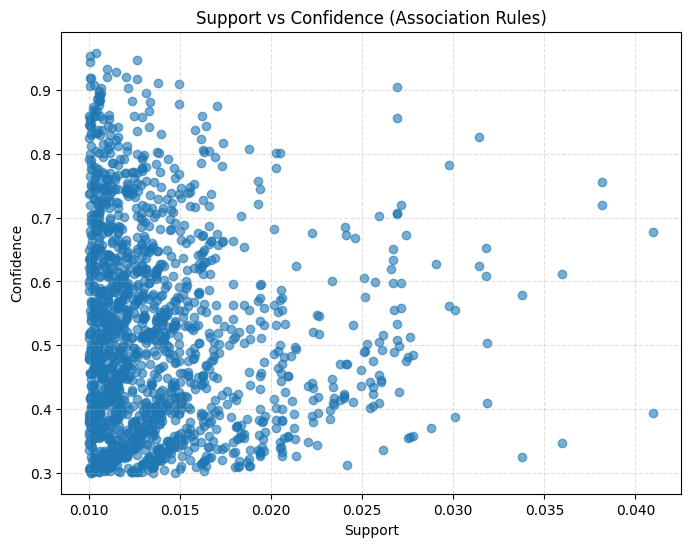

In [13]:
import matplotlib.pyplot as plt

# rules_df cần có ít nhất các cột: 'Support', 'Confidence', 'Lift'
# Ví dụ: rules_df = pd.DataFrame(association_rules)

# (Tuỳ chọn) lọc bớt để dễ nhìn
plot_df = rules_df.dropna(subset=["Support", "Confidence"]).copy()

plt.figure(figsize=(8, 6))
plt.scatter(plot_df["Support"], plot_df["Confidence"], alpha=0.6)

plt.title("Support vs Confidence (Association Rules)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


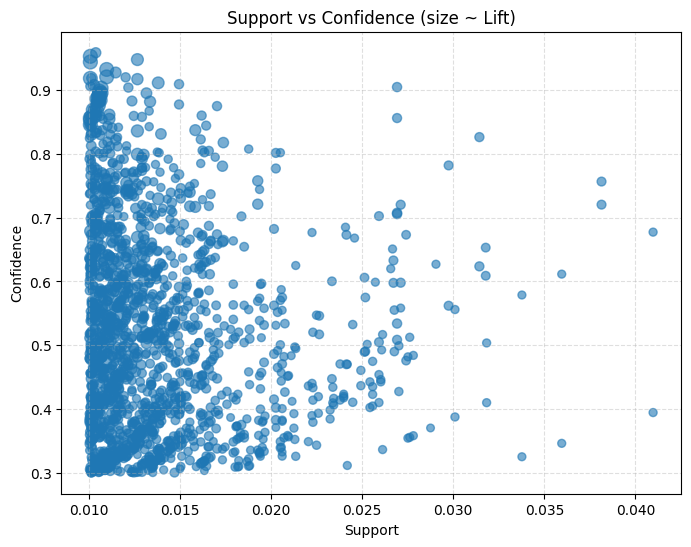

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plot_df = rules_df.dropna(subset=["Support", "Confidence", "Lift"]).copy()

# scale kích thước điểm theo lift (tránh quá to)
sizes = 30 + 70 * (plot_df["Lift"] - plot_df["Lift"].min()) / (plot_df["Lift"].max() - plot_df["Lift"].min() + 1e-9)

plt.figure(figsize=(8, 6))
plt.scatter(plot_df["Support"], plot_df["Confidence"], s=sizes, alpha=0.6)

plt.title("Support vs Confidence (size ~ Lift)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


      Num_items  Confidence
912           3    0.958716
1018          3    0.953052
1524          3    0.947955
1017          3    0.944186
286           2    0.932489


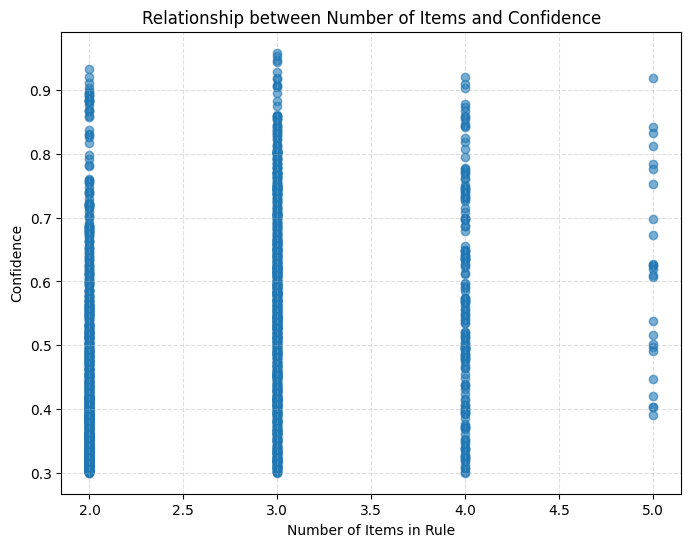

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Tạo cột số item của luật
rules_df["Num_items"] = (
    rules_df["Antecedent"].apply(len) +
    rules_df["Consequent"].apply(len)
)

print(rules_df[["Num_items", "Confidence"]].head())


plt.figure(figsize=(8, 6))
plt.scatter(
    rules_df["Num_items"],
    rules_df["Confidence"],
    alpha=0.6
)

plt.title("Relationship between Number of Items and Confidence")
plt.xlabel("Number of Items in Rule")
plt.ylabel("Confidence")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()
